In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df=pd.read_csv('MD.csv')

In [2]:
df.head()

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,H. Boumous,Hugo Boumous,70,71,1900000,CAM,RM,Morocco,https://cdn.sofifa.net/players/223/618/23_60.png,26,...,71,68,71,61,59,61,59,54,59,20
1,R. Krishna,Roy Krishna,70,70,775000,ST,RM,Fiji,https://cdn.sofifa.net/players/195/620/23_60.png,34,...,70,69,70,65,62,65,63,59,63,20
2,A. Jahouh,Ahmed Jahouh,70,70,800000,CDM,CDM,Morocco,https://cdn.sofifa.net/players/248/297/23_60.png,33,...,64,69,64,67,70,67,65,69,65,18
3,Crivellaro,Rafael Schuler Crivellaro,68,68,750000,CAM,CAM,Brazil,https://cdn.sofifa.net/players/195/838/23_60.png,33,...,68,68,68,60,62,60,57,55,57,13
4,João Victor,João Victor Albuquerque Bruno,68,68,600000,"CDM,CM,CB",CDM,Brazil,https://cdn.sofifa.net/players/191/294/23_60.png,33,...,59,64,59,65,68,65,64,68,64,19


In [3]:
len(df)

97

In [4]:
duplicate_rows = df[df.duplicated()]
df.drop_duplicates(inplace=True)
missing_values = df.isnull().sum()
df.dropna(inplace=True)

len(df)

97

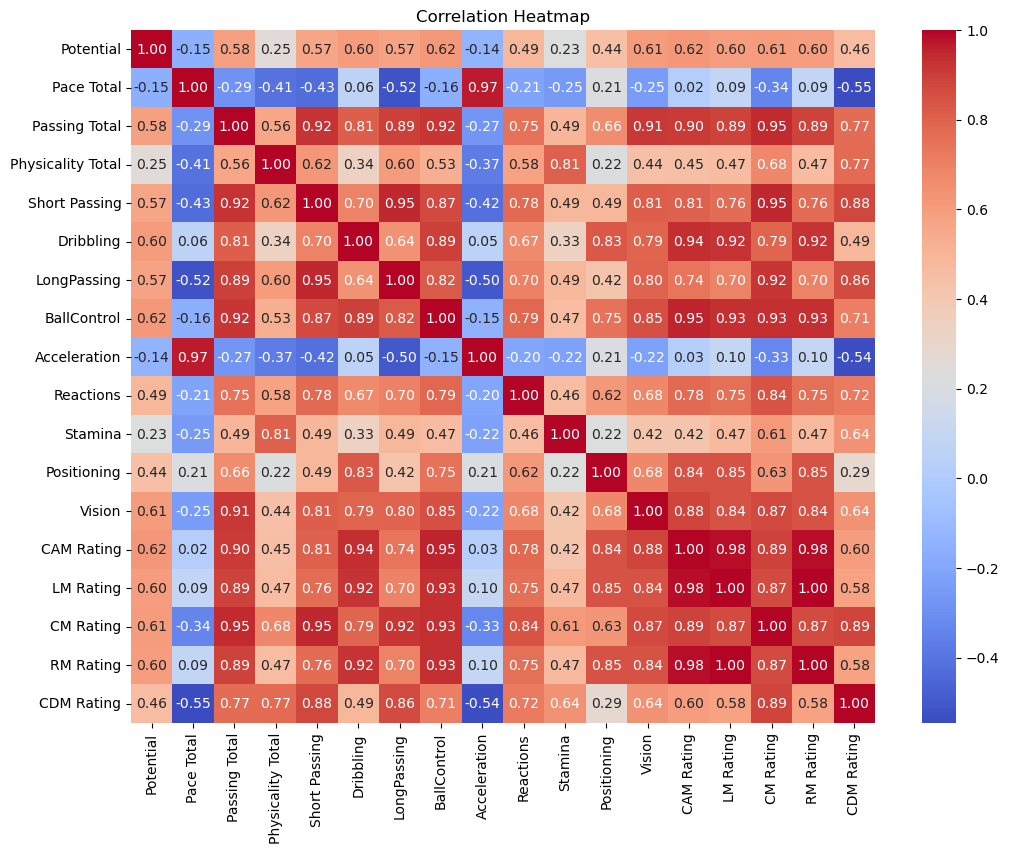

In [6]:
X = df[['Potential','Pace Total','Passing Total','Physicality Total','Short Passing','Dribbling','LongPassing','BallControl','Acceleration','Reactions','Stamina','Positioning','Vision','CAM Rating','LM Rating','CM Rating','RM Rating','CDM Rating']]
correlation_matrix = X.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# RandomForest

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Define features (X) and target variable (y)
X = df[['Potential','Pace Total','Passing Total','Physicality Total','Short Passing','Dribbling','LongPassing','BallControl','Acceleration','Reactions','Stamina','Positioning','Vision','CAM Rating','LM Rating','CM Rating','RM Rating','CDM Rating']]
y = df['Overall']  # Target variable

# Split the data into training and testing sets (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

# Initialize the model (Random Forest Regression as an example)
model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

print("All predicted values:")
print(y_pred)

All predicted values:
[58.84 50.95 49.12 66.97 51.74 51.74 49.33 67.85 57.   52.93 52.03 58.59
 57.83 67.54 54.35 54.3  60.56 56.03 48.96 58.2  54.45 54.98 54.89 54.44
 65.38 55.01 52.49 49.86 66.53 56.88]


In [69]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 3.5720366666666665
R-squared: 0.9097185262152827


In [70]:
# Find the index of the highest predicted overall value
highest_index = y_pred.argmax()

# Retrieve the details of the player with the highest predicted overall value
highest_player_details = df.iloc[X_test.index[highest_index]]

# Print details of the player with the highest predicted overall value
print("Details of the player with the highest predicted overall value:")
print(highest_player_details)

Details of the player with the highest predicted overall value:
Known As            H. Boumous
Full Name         Hugo Boumous
Overall                     70
Potential                   71
Value(in Euro)         1900000
                      ...     
RWB Rating                  61
LB Rating                   59
CB Rating                   54
RB Rating                   59
GK Rating                   20
Name: 0, Length: 89, dtype: object


In [71]:
y_pred = model.predict(X_test)

# Find the index of the lowest predicted overall value
lowest_index = y_pred.argmin()

# Retrieve the details of the player with the lowest predicted overall value
lowest_player_details = df.iloc[X_test.index[lowest_index]]

# Print details of the player with the lowest predicted overall value
print("Details of the player with the lowest predicted overall value:")
print(lowest_player_details)

Details of the player with the lowest predicted overall value:
Known As            G. Nigam
Full Name         Gani Nigam
Overall                   48
Potential                 54
Value(in Euro)         70000
                     ...    
RWB Rating                41
LB Rating                 39
CB Rating                 33
RB Rating                 39
GK Rating                 14
Name: 93, Length: 89, dtype: object


In [72]:
# Filter the original dataframe for Indian players
indian_players_df = df[df['Nationality'] == 'India']

# Get the indices of Indian players in the original dataframe
indian_players_indices = indian_players_df.index.tolist()

# Filter the predictions to only include Indian players from the test set
indian_players_predictions = y_pred[X_test.index.isin(indian_players_indices)]

if len(indian_players_predictions) > 0:
    # Find the index of the highest predicted overall value among Indian players
    highest_indian_index = indian_players_predictions.argmax()

    # Retrieve the index of the player with the highest predicted overall value among Indian players
    index_in_indian_players = indian_players_indices[highest_indian_index]

    # Retrieve the details of the Indian player with the highest predicted overall value
    highest_indian_player_details = df.iloc[index_in_indian_players]

    # Print details of the Indian player with the highest predicted overall value
    print("Details of the Indian player with the highest predicted overall value:")
    print(highest_indian_player_details)
else:
    print("No Indian players in the test set.")

Details of the Indian player with the highest predicted overall value:
Known As            G. Martins
Full Name         Glan Martins
Overall                     56
Potential                   57
Value(in Euro)          140000
                      ...     
RWB Rating                  56
LB Rating                   56
CB Rating                   54
RB Rating                   56
GK Rating                   16
Name: 42, Length: 89, dtype: object


In [73]:
# Filter the original dataframe for Indian players
indian_players_df = df[df['Nationality'] == 'India']

# Get the indices of Indian players in the original dataframe
indian_players_indices = indian_players_df.index.tolist()

# Filter the predictions to only include Indian players from the test set
indian_players_predictions = y_pred[X_test.index.isin(indian_players_indices)]

if len(indian_players_predictions) > 0:
    # Sort the Indian players' predictions and indices in descending order
    sorted_indices = sorted(range(len(indian_players_predictions)), key=lambda i: indian_players_predictions[i], reverse=True)[:5]

    # Retrieve the indices of the top five players among Indian players
    top_five_indices = [indian_players_indices[i] for i in sorted_indices]

    # Retrieve the details of the top five Indian players with the highest predicted overall value
    top_five_indian_players = df.iloc[top_five_indices]

    # Print details of the top five Indian players with the highest predicted overall value
    print("Details of the top five Indian players with the highest predicted overall value:")
    print(top_five_indian_players)
else:
    print("No Indian players in the test set.")


Details of the top five Indian players with the highest predicted overall value:
      Known As              Full Name  Overall  Potential  Value(in Euro)  \
42  G. Martins           Glan Martins       56         57          140000   
34    M. Yasir         Mohammed Yasir       57         62          250000   
18    A. Thapa          Anirudh Thapa       62         68          625000   
29   VP Suhair  Suhair Vadakkepeedika       59         59          220000   
37    V. Singh           Vikram Singh       56         64          325000   

   Positions Played Best Position Nationality  \
42           CDM,CM            CM       India   
34        RW,CAM,LW            LM       India   
18           CM,CDM            CM       India   
29         LM,ST,RM            LM       India   
37         RM,ST,LM            RM       India   

                                          Image Link  Age  ...  LM Rating  \
42  https://cdn.sofifa.net/players/259/346/23_60.png   28  ...         57   
34  htt

# LinearRegression

In [126]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Assuming 'X' contains the features and 'y' contains the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the linear regression model
linear_reg = LinearRegression()

# Fit the model to the training data
linear_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = linear_reg.predict(X_test)

print("All predicted values:")
print(y_pred)

All predicted values:
[52.79811881 58.2005241  46.62477372 65.17896933 51.94002362 52.42272847
 53.42967844 56.12755685 64.70677498 72.57549205 58.74241396 56.57962509
 55.4355737  55.98290889 53.8514919  63.2678349  61.75341509 68.42378646
 50.33925998 49.68047109 56.33853972 55.31571975 49.44231966 67.5673575
 56.8617781  55.0321492  69.09372613 51.48068113 64.26732908 54.31039022]


In [127]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# To print coefficients and intercept
print("Coefficients:", linear_reg.coef_)
print("Intercept:", linear_reg.intercept_)

Mean Squared Error: 5.117108591189763
R-squared: 0.8526036891640011
Coefficients: [ 0.10225464  0.04380767  0.44920758  0.08510108 -0.05139755  0.03956157
 -0.2120915   0.0763203  -0.1214093   0.11584262  0.01540407 -0.16091564
 -0.17462605  0.36314371  0.22649321  0.09159045  0.22649321 -0.08308395]
Intercept: -1.6311623852519261


In [128]:
# Find the index of the highest predicted overall value
highest_index = y_pred.argmax()

# Retrieve the details of the player with the highest predicted overall value
highest_player_details = df.iloc[X_test.index[highest_index]]

# Print details of the player with the highest predicted overall value
print("Details of the player with the highest predicted overall value:")
print(highest_player_details)

Details of the player with the highest predicted overall value:
Known As            H. Boumous
Full Name         Hugo Boumous
Overall                     70
Potential                   71
Value(in Euro)         1900000
                      ...     
RWB Rating                  61
LB Rating                   59
CB Rating                   54
RB Rating                   59
GK Rating                   20
Name: 0, Length: 89, dtype: object


In [129]:
# Filter the original dataframe for Indian players
indian_players_df = df[df['Nationality'] == 'India']

# Get the indices of Indian players in the original dataframe
indian_players_indices = indian_players_df.index.tolist()

# Filter the predictions to only include Indian players from the test set
indian_players_predictions = y_pred[X_test.index.isin(indian_players_indices)]

if len(indian_players_predictions) > 0:
    # Sort the Indian players' predictions and indices in descending order
    sorted_indices = sorted(range(len(indian_players_predictions)), key=lambda i: indian_players_predictions[i], reverse=True)[:5]

    # Retrieve the indices of the top five players among Indian players
    top_five_indices = [indian_players_indices[i] for i in sorted_indices]

    # Retrieve the details of the top five Indian players with the highest predicted overall value
    top_five_indian_players = df.iloc[top_five_indices]

    # Print details of the top five Indian players with the highest predicted overall value
    print("Details of the top five Indian players with the highest predicted overall value:")
    print(top_five_indian_players)
else:
    print("No Indian players in the test set.")


Details of the top five Indian players with the highest predicted overall value:
          Known As              Full Name  Overall  Potential  Value(in Euro)  \
23           Apuia      Lalengmawia Ralte       60         69          525000   
28        B. Singh            Bipin Singh       60         60          250000   
19  S. Abdul Samad      Sahal Abdul Samad       62         65          525000   
39        R. Singh           Roshan Singh       56         65          300000   
29       VP Suhair  Suhair Vadakkepeedika       59         59          220000   

   Positions Played Best Position Nationality  \
23           CDM,CM           CDM       India   
28            LM,RM            LM       India   
19        RM,LM,CAM           CAM       India   
39            LB,RB            LM       India   
29         LM,ST,RM            LM       India   

                                          Image Link  Age  ...  LM Rating  \
23  https://cdn.sofifa.net/players/253/712/23_60.png   21  .

# DecisionTree

In [174]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split


# Assuming 'X' contains the features and 'y' contains the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Initialize the decision tree regressor model
tree_reg = DecisionTreeRegressor()

# Fit the model to the training data
tree_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = tree_reg.predict(X_test)

# Print all predicted values
print("All predicted values:")
print(y_pred)


All predicted values:
[55. 55. 60. 48. 56. 55. 49. 52. 51. 54. 52. 49. 52. 53. 54. 60. 51. 60.
 65. 67. 54. 60. 55. 63. 48. 55. 56. 55. 48. 48.]


In [175]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# To print coefficients and intercept
print("Coefficients:", linear_reg.coef_)
print("Intercept:", linear_reg.intercept_)

Mean Squared Error: 4.0
R-squared: 0.8351346400439641
Coefficients: [ 0.10225464  0.04380767  0.44920758  0.08510108 -0.05139755  0.03956157
 -0.2120915   0.0763203  -0.1214093   0.11584262  0.01540407 -0.16091564
 -0.17462605  0.36314371  0.22649321  0.09159045  0.22649321 -0.08308395]
Intercept: -1.6311623852519261


In [176]:
# Find the index of the highest predicted overall value
highest_index = y_pred.argmax()

# Retrieve the details of the player with the highest predicted overall value
highest_player_details = df.iloc[X_test.index[highest_index]]

# Print details of the player with the highest predicted overall value
print("Details of the player with the highest predicted overall value:")
print(highest_player_details)

Details of the player with the highest predicted overall value:
Known As             A. Jahouh
Full Name         Ahmed Jahouh
Overall                     70
Potential                   70
Value(in Euro)          800000
                      ...     
RWB Rating                  67
LB Rating                   65
CB Rating                   69
RB Rating                   65
GK Rating                   18
Name: 2, Length: 89, dtype: object


In [177]:
# Filter the original dataframe for Indian players
indian_players_df = df[df['Nationality'] == 'India']

# Get the indices of Indian players in the original dataframe
indian_players_indices = indian_players_df.index.tolist()

# Filter the predictions to only include Indian players from the test set
indian_players_predictions = y_pred[X_test.index.isin(indian_players_indices)]

if len(indian_players_predictions) > 0:
    # Sort the Indian players' predictions and indices in descending order
    sorted_indices = sorted(range(len(indian_players_predictions)), key=lambda i: indian_players_predictions[i], reverse=True)[:5]

    # Retrieve the indices of the top five players among Indian players
    top_five_indices = [indian_players_indices[i] for i in sorted_indices]

    # Retrieve the details of the top five Indian players with the highest predicted overall value
    top_five_indian_players = df.iloc[top_five_indices]

    # Print details of the top five Indian players with the highest predicted overall value
    print("Details of the top five Indian players with the highest predicted overall value:")
    print(top_five_indian_players)
else:
    print("No Indian players in the test set.")


Details of the top five Indian players with the highest predicted overall value:
         Known As                Full Name  Overall  Potential  \
42     G. Martins             Glan Martins       56         57   
21   B. Fernandes        Brandon Fernandes       60         60   
36   M. Soosairaj        Michael Soosairaj       56         56   
38      A. Jadhav            Aniket Jadhav       56         66   
40  L. Khawlhring  Lalthathanga Khawlhring       56         62   

    Value(in Euro) Positions Played Best Position Nationality  \
42          140000           CDM,CM            CM       India   
21          250000           LM,CAM            LM       India   
36          150000            LM,LB            LM       India   
38          325000            LM,RM            RM       India   
40          220000        CM,CDM,LM           CDM       India   

                                          Image Link  Age  ...  LM Rating  \
42  https://cdn.sofifa.net/players/259/346/23_60.png  

# Support Vector Regression

In [220]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

# Assuming 'X' contains the features and 'y' contains the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

# Initialize the Support Vector Machine for Regression (SVR) model
svm_reg = SVR(kernel='rbf')  # 'rbf' kernel is often used for non-linear relationships

# Fit the model to the training data
svm_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_reg.predict(X_test)

# Print all predicted values
print("All predicted values:")
print(y_pred)


All predicted values:
[51.75252724 52.80513311 56.5702172  55.62127305 57.26792946 63.21596412
 62.6227115  51.61048372 56.10787231 62.36197974 52.76189362 53.13570494
 63.24584086 53.09610753 62.87102488 59.28181487 53.59999351 63.63256237
 53.21105738 55.89760977 56.59831071 54.78869842 52.41757302 53.67398613
 60.24153254 57.7519302  63.73279838 56.37367093 53.16309661 51.82451759]


In [221]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 6.388543623931532
R-squared: 0.8269000101897165


In [222]:
# Find the index of the highest predicted overall value
highest_index = y_pred.argmax()

# Retrieve the details of the player with the highest predicted overall value
highest_player_details = df.iloc[X_test.index[highest_index]]

# Print details of the player with the highest predicted overall value
print("Details of the player with the highest predicted overall value:")
print(highest_player_details)

Details of the player with the highest predicted overall value:
Known As               D. Petratos
Full Name         Dimitri Petratos
Overall                         66
Potential                       66
Value(in Euro)              850000
                        ...       
RWB Rating                      62
LB Rating                       60
CB Rating                       55
RB Rating                       60
GK Rating                       19
Name: 12, Length: 89, dtype: object


In [223]:
# Filter the original dataframe for Indian players
indian_players_df = df[df['Nationality'] == 'India']

# Get the indices of Indian players in the original dataframe
indian_players_indices = indian_players_df.index.tolist()

# Filter the predictions to only include Indian players from the test set
indian_players_predictions = y_pred[X_test.index.isin(indian_players_indices)]

if len(indian_players_predictions) > 0:
    # Sort the Indian players' predictions and indices in descending order
    sorted_indices = sorted(range(len(indian_players_predictions)), key=lambda i: indian_players_predictions[i], reverse=True)[:5]

    # Retrieve the indices of the top five players among Indian players
    top_five_indices = [indian_players_indices[i] for i in sorted_indices]

    # Retrieve the details of the top five Indian players with the highest predicted overall value
    top_five_indian_players = df.iloc[top_five_indices]

    # Print details of the top five Indian players with the highest predicted overall value
    print("Details of the top five Indian players with the highest predicted overall value:")
    print(top_five_indian_players)
else:
    print("No Indian players in the test set.")


Details of the top five Indian players with the highest predicted overall value:
              Known As                Full Name  Overall  Potential  \
25           L. Colaco            Liston Colaco       60         68   
32  J. Mawihmingthanga    Jerry Mawihmingthanga       58         61   
40       L. Khawlhring  Lalthathanga Khawlhring       56         62   
24        L. Rodrigues          Lenny Rodrigues       60         60   
36        M. Soosairaj        Michael Soosairaj       56         56   

    Value(in Euro) Positions Played Best Position Nationality  \
25          550000            LW,RW           CAM       India   
32          275000               RM            RM       India   
40          220000        CM,CDM,LM           CDM       India   
24           70000           CDM,CM           CDM       India   
36          150000            LM,LB            LM       India   

                                          Image Link  Age  ...  LM Rating  \
25  https://cdn.sofifa.n

# K-Nearest Neighbors (KNN)

In [235]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

# Assuming 'X' contains the features and 'y' contains the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the KNN regressor model (with, for instance, k=5 neighbors)
knn_reg = KNeighborsRegressor(n_neighbors=5)

# Fit the model to the training data
knn_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_reg.predict(X_test)

# Print all predicted values
print("All predicted values:")
print(y_pred)

All predicted values:
[55.4 55.6 48.4 64.2 51.6 52.2 54.2 55.6 61.8 66.4 56.2 55.2 54.  56.
 55.6 63.8 61.2 64.8 50.8 52.  54.8 54.  53.  63.6 54.8 55.8 66.4 53.
 65.4 52. ]


In [236]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 3.3173333333333352
R-squared: 0.9044455112818051


In [237]:
# Find the index of the highest predicted overall value
highest_index = y_pred.argmax()

# Retrieve the details of the player with the highest predicted overall value
highest_player_details = df.iloc[X_test.index[highest_index]]

# Print details of the player with the highest predicted overall value
print("Details of the player with the highest predicted overall value:")
print(highest_player_details)

Details of the player with the highest predicted overall value:
Known As            H. Boumous
Full Name         Hugo Boumous
Overall                     70
Potential                   71
Value(in Euro)         1900000
                      ...     
RWB Rating                  61
LB Rating                   59
CB Rating                   54
RB Rating                   59
GK Rating                   20
Name: 0, Length: 89, dtype: object


In [238]:
# Filter the original dataframe for Indian players
indian_players_df = df[df['Nationality'] == 'India']

# Get the indices of Indian players in the original dataframe
indian_players_indices = indian_players_df.index.tolist()

# Filter the predictions to only include Indian players from the test set
indian_players_predictions = y_pred[X_test.index.isin(indian_players_indices)]

if len(indian_players_predictions) > 0:
    # Sort the Indian players' predictions and indices in descending order
    sorted_indices = sorted(range(len(indian_players_predictions)), key=lambda i: indian_players_predictions[i], reverse=True)[:5]

    # Retrieve the indices of the top five players among Indian players
    top_five_indices = [indian_players_indices[i] for i in sorted_indices]

    # Retrieve the details of the top five Indian players with the highest predicted overall value
    top_five_indian_players = df.iloc[top_five_indices]

    # Print details of the top five Indian players with the highest predicted overall value
    print("Details of the top five Indian players with the highest predicted overall value:")
    print(top_five_indian_players)
else:
    print("No Indian players in the test set.")

Details of the top five Indian players with the highest predicted overall value:
              Known As                Full Name  Overall  Potential  \
23               Apuia        Lalengmawia Ralte       60         69   
28            B. Singh              Bipin Singh       60         60   
32  J. Mawihmingthanga    Jerry Mawihmingthanga       58         61   
40       L. Khawlhring  Lalthathanga Khawlhring       56         62   
19      S. Abdul Samad        Sahal Abdul Samad       62         65   

    Value(in Euro) Positions Played Best Position Nationality  \
23          525000           CDM,CM           CDM       India   
28          250000            LM,RM            LM       India   
32          275000               RM            RM       India   
40          220000        CM,CDM,LM           CDM       India   
19          525000        RM,LM,CAM           CAM       India   

                                          Image Link  Age  ...  LM Rating  \
23  https://cdn.sofifa.n